# [NTDS'18] milestone 3: spectral graph theory
[ntds'18]: https://github.com/mdeff/ntds_2018

[Michaël Defferrard](http://deff.ch), [EPFL LTS2](https://lts2.epfl.ch)

## Students

* Team: `4`
* Students: `Julien Berger, Jérémy Jayet, Hana Samet, Mathieu Shiva`
* Dataset: `IMDb Films and Crew`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The goal of this milestone is to get familiar with the graph Laplacian and its spectral decomposition.

## 0 Load your network

In [8]:
%matplotlib inline

If you get a `No module named 'sklearn'` error when running the below cell, install [scikit-learn](https://scikit-learn.org) with `conda install scikit-learn` (after activating the `ntds_2018` environment).

In [9]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Let's denote your graph as $\mathcal{G} = (\mathcal{V}, \mathcal{E}, A)$, where $\mathcal{V}$ is the set of nodes, $\mathcal{E}$ is the set of edges, $A \in \mathbb{R}^{N \times N}$ is the (weighted) adjacency matrix, and $N = |\mathcal{V}|$ is the number of nodes.

Import the adjacency matrix $A$ that you constructed in the first milestone.
(You're allowed to update it between milestones if you want to.)

In [10]:
adjacency = np.load('./data/adjacency.npy')
    
#We calculate the number of nodes   
n_nodes=adjacency.shape[0]

#We make the matrix more sparse by removing the link between two people if they worked only on 1 movie together
adjacency[adjacency <2]=0

n_edges =  np.count_nonzero(adjacency)/2

## 1 Graph Laplacian

### Question 1

From the (weighted) adjacency matrix $A$, compute both the combinatorial (also called unnormalized) and the normalized graph Laplacian matrices.

Note: if your graph is weighted, use the weighted adjacency matrix. If not, use the binary adjacency matrix.

For efficient storage and computation, store these sparse matrices in a [compressed sparse row (CSR) format](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_.28CSR.2C_CRS_or_Yale_format.29).

In [11]:
#adj= np.array([[0,1,0], [1,0,1] ,[0,1,0]])

adjacency_csr= sparse.csr_matrix(adjacency)

degree_csr= sparse.spdiags(np.sum(adjacency, axis=1),0,n_nodes,n_nodes)

laplacian_combinatorial =degree_csr-adjacency_csr

laplacian_normalized = degree_csr.power(-1/2)*laplacian_combinatorial*degree_csr.power(-1/2)

C:\Users\lekil\Miniconda3\envs\Week_4\lib\site-packages\scipy\sparse\data.py:116: RuntimeWarning: divide by zero encountered in power
  return self._with_data(data ** n)


Use one of them as the graph Laplacian $L$ for the rest of the milestone.
We however encourage you to run the code with both to get a sense of the difference!

In [12]:
laplacian =laplacian_normalized  # Either laplacian_combinatorial or laplacian_normalized.

### Question 2

Compute the eigendecomposition of the Laplacian $L = U^\top \Lambda U$, where the columns $u_k \in \mathbb{R}^N$ of $U = [u_1, \dots, u_N] \in \mathbb{R}^{N \times N}$ are the eigenvectors and the diagonal elements $\lambda_k = \Lambda_{kk}$ are the corresponding eigenvalues.

Make sure that the eigenvalues are ordered, i.e., $0 = \lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_N$.

In [ ]:
#solution1 using sparse matrix 
eigenvectors=[]
eigenvalues=[]
eigenvalues, eigenvectors= np.linalg.eigh(laplacian.toarray())

indx=np.argsort(eigenvalues)

eigenvalues=eigenvalues[indx]
eigenvectors=eigenvectors[indx]

eigenvalues

assert eigenvectors.shape == (n_nodes, n_nodes)

Justify your choice of eigensolver.

eig is a good, fast, general use eigenvalue/vector solver. It is appropriate for use when your matrix is of a realistic size that fits well in memory, and when you need all of the eigenvalues/vectors. Sparse matrices do not work at all in eig.

<abbr title="C'est vraiment ça ?">Eigs</abbr> is a solver that is more appropriate for when you need only a limited subset of the eigenvalues/vectors. Here the matrix is often stored in sparse format, because as a full matrix, it would take up too much memory to store. 

The number of eigenvalues and eigenvectors desired. k must be smaller than N-1. It is not possible to compute all eigenvectors of a matrix.
A solution is to  decompose the original laplacian into smaller matrices and find the eigenvectors and eigenvalues for each and then combine them or just use eig and tranform the laplacian into a numpy matrix.

### Question 3

We can write $L = S S^\top$. What is the matrix $S$? What does $S^\top x$, with $x \in \mathbb{R}^N$, compute?

S is the incidence matrix :

S( i,j )= +1 if $e_j =(v_i,v_k)$ for some k 

or S( i,j )= -1 if $e_j =(v_k,v_i)$ for some k

or S( i,j )=0 otherwise

with $x \in \mathbb{R}^N$  $S^\top x$ computes the gradient of x 

$S^\top x \in \mathbb{R}^m$

### Question 4

Show that $\lambda_k = \| S^\top u_k \|_2^2$, where $\| \cdot \|_2^2$ denotes the squared Euclidean norm (a.k.a. squared $L^2$ norm).

$L= U^\top Λ U$ when we replace $L = S S^\top$ ans compute the equation for one eigenvalue and one eigenvector,We obtain $\lambda_k =u_k^\top  S S^\top u_k$    = the squared euclidien norm of $S^\top u_k$

$u_k$ can be written as the inner product of the vector $S^\top u_k$ with itself,which is the squared euclidien norm of $S^\top u_k$, this shows that $u_k \geq 0$ and so the eigenvalues of L are all non-negative.

What does the quantity $\| S^\top x \|_2^2$ tell us about $x$?

We know that $ x^\top L x = \frac{1}{2} \sum_{i,j = 0}^{n_{nodes}}{w( i,j )(x_i - x_j)^2}$

And since  $L = S S^\top$  .We obtain  $ x^\top S^\top S x = \frac{1}{2} \sum_{i,j = 0}^{n_{nodes}}{w( i,j ) (x_i - x_j)^2 }$ 

So   $\| S^\top x \|_2^2 = \frac{1}{2} \sum_{i,j = 0}^{n_{nodes}}{w( i,j ) (x_i - x_j)^2}$

### Question 5

What is the value of $u_0$, both for the combinatorial and normalized Laplacians?

$u_0$ is the algebraic connectivity for both the combinatorial and  normalized laplacians it is equal to zero and it's multiplicity gives connectedness of graph.The dimension of the nullspace of L (the eigenspace of 0) is equal to the number of connected components of the underlying graph of G.
The eigenvector associated with the algebraic connectivity has been named the *Fiedler vector*. The Fiedler vector can be used to partition a graph.

### Question 6

Look at the spectrum of the Laplacian by plotting the eigenvalues.
Comment on what you observe.

In [ ]:
eigenvalues.shape[0]
n = np.linspace(0,eigenvalues.shape[0]-1,eigenvalues.shape[0])
eigenvalues[eigenvalues <1E-2]=0
plt.plot(n,eigenvalues)
plt.title('Eigenvalues')

**Your answer here.**

How many connected components are there in your graph? Answer using the eigenvalues only.

In [ ]:
number_connected_components=np.where(eigenvalues== 0)
a = len(number_connected_components[0])
print(f'There are {a} connected components.')

Is there an upper bound on the eigenvalues, i.e., what is the largest possible eigenvalue? Answer for both the combinatorial and normalized Laplacians.

For the normalised Laplacian the largest possible eigenvalue is 2 . 

For the combinatorial Laplacian the upperbound is **to be completed**

## 3 Laplacian eigenmaps

*Laplacian eigenmaps* is a method to embed a graph $\mathcal{G}$ in a $d$-dimensional Euclidean space.
That is, it associates a vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$.
The graph $\mathcal{G}$ is thus embedded as $Z \in \mathbb{R}^{N \times d}$.

### Question 7

What do we use Laplacian eigenmaps for? (Or more generally, graph embeddings.)

Laplacian eigenmaps is a technique used in order to dimentionally reduce the data. High dimentional data can be hard to visualize/interpret. Therefore if we assume that the data lies on an embedded manifold within the higher-dimensional space and if the manifold is of 2 or 3 dimensions for example, we can use the eigenmaps decomposition in order to visualize the data.

### Question 8

Embed your graph in $d=2$ dimensions with Laplacian eigenmaps.
Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.

**Recompute** the eigenvectors you need with a partial eigendecomposition method for sparse matrices.
When $k \ll N$ eigenvectors are needed, partial eigendecompositions are much more efficient than complete eigendecompositions.
A partial eigendecomposition scales as $\Omega(k |\mathcal{E}|$), while a complete eigendecomposition costs $\mathcal{O}(N^3)$ operations.

We've seen earlier that our graph has 343 connected components. However most of these connected components are nodes that are not connected to any other node. We have only 2 components that have more than 1 node. And from those two, one of them nearly englobes all the nodes (9276 outof a total of 9628). Therefore this giant component will be the only one we will be considering for the Laplacian Eigenmaps embedding:

In [19]:
# First, we will build the combinatorial laplacian of the giant component.

import src.find_components as fcomp
# We need to have a connected graph.
# As our network is not connected, we use the adjacency matrix of the largest connected component instead

# The first element of the connectedIndices matrix is a vector of length equal to n_nodes
# The value of its elements is 1 if the element is in the largest connected componenent and 0 if it is not
connectedIndices = fcomp.find_components(adjacency)
biggestComponentSize = np.amax(np.sum(connectedIndices, axis=1))

# get the adjacency matrix of the largest connected component of our network
indx=np.array(range(n_nodes),dtype=int)
indx=connectedIndices[0].astype(int)*indx
indx_without_zeros=np.unique(indx)
Biggest_component=adjacency[indx_without_zeros,:][:,indx_without_zeros]

laplacian_biggest_component = np.diag(np.sum(Biggest_component, axis=0)) - Biggest_component
laplacian_biggest_component = laplacian_biggest_component.astype(float)

In [20]:
# For an unknown reason, sparse.linalg.eigs takes more time than the np.linalg.eigh, therefore we will use the latter and take
# the first two vectors associated to the first 2 non-zero eigenvalues => the 2nd and the 3rd eigenvectors in vecs.
vals, vecs = np.linalg.eigh(laplacian_biggest_component)

# Sorting the values/associated vectors, from smallest to largest:
idx = vals.argsort()[::-1]   
vals = vals[idx]
vecs = vecs[:,idx]

Plot the nodes embedded in 2D. Comment on what you see.

Text(0.5, 1.0, 'Normalized by eigenvalues')

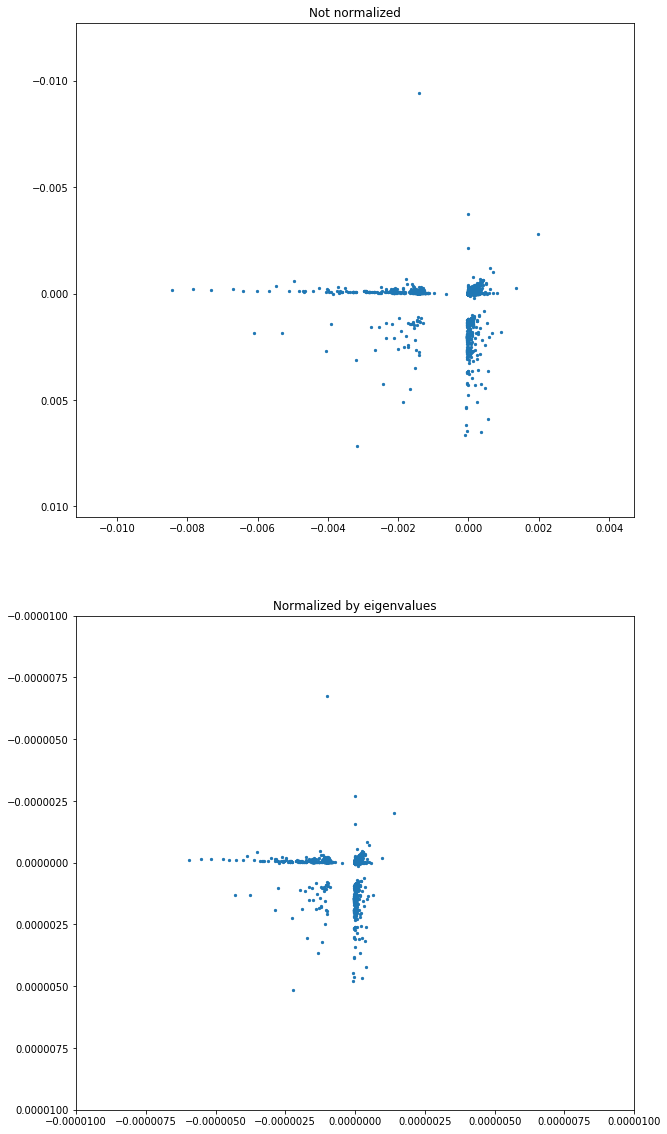

In [51]:
plt.figure(figsize=(10, 20))
plt.subplot(211)
plt.scatter(vecs[:,1],vecs[:,2],s=5)
plt.gca().invert_yaxis()
plt.title('Not normalized')

plt.subplot(212)
plt.scatter(vecs[:,1]/vals[1],vecs[:,2]/vals[2],s=5)
plt.axis([-0.00001,0.00001,-0.00001,0.00001])
plt.gca().invert_yaxis()
plt.title('Normalized by eigenvalues') 

We can see that all of our points are very close together. As the laplacian eigenmaps preserve the locality, this means that our nodes are also very close together in the high dimention state state, suggesting a very connected graph.

### Question 9

What does the embedding $Z \in \mathbb{R}^{N \times d}$ preserve?

**Your answer here.**

## 2 Spectral clustering

*Spectral clustering* is a method to partition a graph into distinct clusters.
The method associates a feature vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$, then runs [$k$-means](https://en.wikipedia.org/wiki/K-means_clustering) in the embedding space $\mathbb{R}^d$ to assign each node $v_i \in \mathcal{V}$ to a cluster $c_j \in \mathcal{C}$, where $k = |\mathcal{C}|$ is the number of desired clusters.

### Question 10

Choose $k$ and $d$. How did you get to those numbers?

We chose to cluster the nodes (the actors) by using their ratings in each genre of film to which they participated. To do so, we first computed the mean of the ratings for each genre and for each actor. For example, the table could you look like the following :

| Actor | Action genre | Science fiction genre | Fantasy genre | ... |
|---|---|---|---|---|
| Arnold Schwarzenegger | 10 | 8 | 0 | ... |
| Ryan Reynold | 3 | 0 | 10 | ... |


It would enable us to see if actors playing in the same kind of film are more interconnected.

This dataset contains 18 genres, thus $k = 18$. As we have the average rating of each genre for each node, our dataset will be clustered in a space of the same number of dimensions, so $d = k = 18$

### Question 11

1. Embed your graph in $\mathbb{R}^d$ as $Z \in \mathbb{R}^{N \times d}$.
   Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.
1. If you want $k=2$ clusters, partition with the Fiedler vector. For $k > 2$ clusters, run $k$-means on $Z$. Don't implement $k$-means, use the `KMeans` class imported from scikit-learn.

In [174]:
import pandas as pd

k_clusters = 18

people = pd.read_csv('data/features_v3.csv')

#people.fillna(0)

genre_ratings = people.iloc[indx_without_zeros,5:23]

trueLabels = people.iloc[indx_without_zeros,4]

#genre_ratings.fillna(0, inplace=True)

kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(genre_ratings.values)

predictedLabels = kmeans.labels_

In [169]:
#code de julien pour predict les labels
#we take the first 18 eigenvectors
selected_eigenvectors=vecs[0:k_clusters].T
selected_eigenvectors.shape #this is R 9276x18
kmeans=KMeans(n_clusters=k_clusters, random_state=0).fit(selected_eigenvectors)
predictedLabels = kmeans.labels_

### Question 12

Use the computed cluster assignment to reorder the adjacency matrix $A$.
What do you expect? What do you observe?

In [175]:
s = int(biggestComponentSize)

tmp_adjacency = np.zeros((s,s))
ordered_adjacency = np.zeros((s,s))

a = 0
for k in range(0,k_clusters):
    indexes = np.argwhere(predictedLabels==k)
    for i in np.nditer(indexes):
        tmp_adjacency[a,:] = Biggest_component[i,:]
        a = a+1
        
a = 0
for k in range(0,k_clusters):
    indexes = np.argwhere(predictedLabels==k)
    for i in np.nditer(indexes):
        ordered_adjacency[:,a] = tmp_adjacency[:,i]
        a = a+1

Text(0.5, 1.05, 'Adjacency matrix')

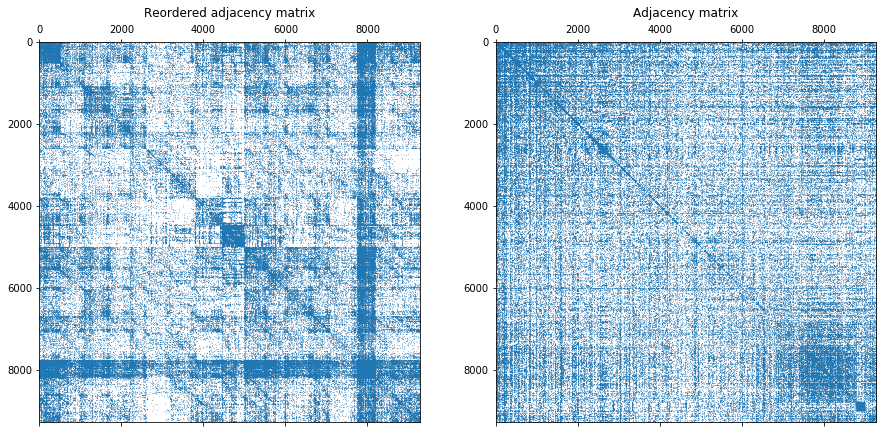

In [176]:
plt.figure(figsize=(15, 20))
plt.subplot(121)
plt.spy(ordered_adjacency, markersize=0.1)
plt.title('Reordered adjacency matrix')
plt.subplot(122)
plt.spy(Biggest_component, markersize=0.1)
plt.title('Adjacency matrix')


We were expecting to see a pattern in the adjacency matrix. 
This is indeed what we can observe on the reordered matrix. We can see some squares around the diagonal of the adjacency matrix, which means that actors in the same cluster are very connected, and have less conexion with other clusters. 

We can also see that one cluster has connexion with almost everyother clusters (this can be seen with the vertical and horizontal bars around node 8000). This means that this cluster is composed of nodes that are very connected (hubs).

### Question 13

If you have ground truth clusters for your dataset, compare the cluster assignment from spectral clustering to the ground truth.
A simple quantitative measure is to compute the percentage of nodes that have been correctly categorized.
If you don't have a ground truth, qualitatively assess the quality of the clustering.

Ground truth clusters are the "real clusters".
For example, the genre of musical tracks in FMA, the category of Wikipedia articles, the spammer status of individuals, etc.
Look for the `labels` in the [dataset descriptions](https://github.com/mdeff/ntds_2018/tree/master/projects/README.md).

In [177]:
labels = pd.DataFrame({'true_labels' : trueLabels, 'idx_true_labels': 0, 'predicted_labels' : predictedLabels})

maxLabel = int(np.max(labels['true_labels']))

#print(f'Max label {maxLabel}')

for i in range(0,maxLabel):
    A = labels.query(f'true_labels == {i}')
    B = A['predicted_labels'].value_counts()
    
    if B.empty == False:
        predictedLabelOfGenre = B.idxmax()
        for node in labels.iterrows():
            if node[1]['true_labels'] == i:
                labels.loc[node[0],'idx_true_labels'] = predictedLabelOfGenre
                
correctlyClassified = labels.query('idx_true_labels == predicted_labels').shape

fractionCorrectlyClassified = 100*correctlyClassified[0]/labels.shape[0]

print(f'The number of well classified nodes represents {fractionCorrectlyClassified}%')

The number of well classified nodes represents 15.362225097024579%


In [178]:
nb_classified=np.arange(k_clusters)
nb_true=np.arange(k_clusters)
nb_idx_true=np.arange(k_clusters)
for i in range(0,k_clusters):
    nb_true[i]=len(np.where(labels['true_labels']==i)[0])
    nb_idx_true[i]=len(np.where(labels['idx_true_labels']==i)[0])
    nb_classified[i]=len(np.where(labels['predicted_labels']==i)[0])

print(nb_true)
print(nb_idx_true)
print(nb_classified)
#Qaud on utilise ma version de kmeans idx_true_labels qui devrait probablement être calculé autrement 
#(mais je ne vois vraiment pas comment), parce que il donne des résultats disproportionnés.
# Par contre  les predicted labels ont l'air mieux dans ma version (avec un super cluster de 3842)

#Et quand on l'utilise avec ta version, il y a un problème avec la dernière valeur(qui contient tout dun coup 4441 acteurs)
#de plus, les clusters ont un nombre de nodes assez similaire 300-600, sans aucun super cluster.
#donc je me dis que la classification est peut-être moins bonne.

[3269  823   70  246   83 2422  105   17 1880    1    0    7    9   73
    4  262    1    4]
[   4    0  178    0    0 2422 1880    1    0  263    0   79    1    0
    7    0    0 4441]
[500 576 650 473 399 587 617 646 286 256 573 472 646 394 672 429 498 602]


Here, we took as the ground truth the genre of each actor. This genre is determined by the movie genre in which the actor acted the most.
###### Example
Arnold Schwarzenegger played in 76 action movies, 35 science fiction movies and 26 other genre of movies. Therefore, his label will be **action genre**.

#### Conclusion

The clustering seems to assign blablabla

### Question 14

Plot the cluster assignment (one color per cluster) on the 2D embedding you computed above with Laplacian eigenmaps.

Text(0.5, 1.0, 'Cluster assignment zoom')

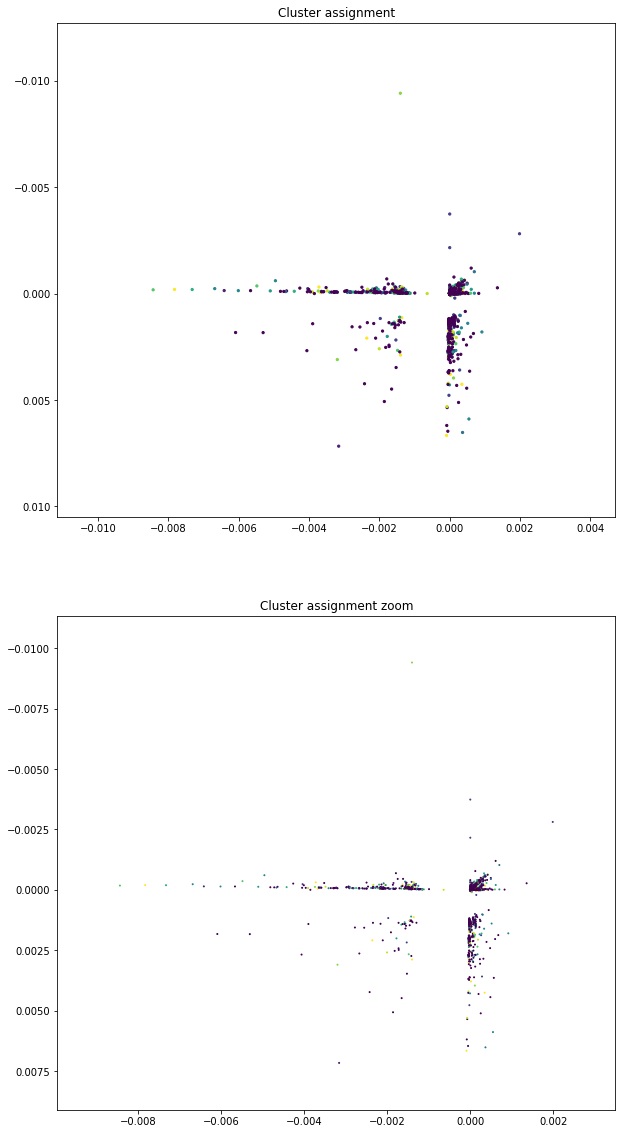

In [42]:
import matplotlib as mpl
from matplotlib import cm

viridis = cm.get_cmap('viridis', 12)

plt.figure(figsize=(10, 20))

plt.subplot(211)
plt.scatter(vecs[:,1],vecs[:,2],s=5, c=predictedLabels, cmap=viridis)
plt.gca().invert_yaxis()
plt.title('Cluster assignment')

dataPoints = vecs

dataPoints[dataPoints>0.01]=0
dataPoints[dataPoints<-0.01]=0

plt.subplot(212)
plt.scatter(dataPoints[:,1],dataPoints[:,2],s=1, c=predictedLabels, cmap=viridis)
plt.gca().invert_yaxis()
plt.title('Cluster assignment zoom')

### Question 15

Why did we use the eigenvectors of the graph Laplacian as features? Could we use other features for clustering?

In [ ]:
Using the eigenvec